# IMSRacing dataset: Getting started

In [68]:
%load_ext autoreload
%autoreload 2

# this is needed for jupyter notebooks and due to the bad Python implementation of async which does not allow nested loops (and notebooks already start a loop)
# this is likely ONLY useful in notebooks and similar environments
import nest_asyncio
nest_asyncio.apply()

from pathlib import Path
import logging
import os

import pandas as pd
import numpy as np
import lib_ims
import matplotlib
import matplotlib.pyplot as plt

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Some setup

In [15]:
# Setup logger to work in jupyter notebooks and set log level to debug (just to make sure we see everything logged there)
logger: logging.Logger = lib_ims.get_ims_logger()
if not logger.hasHandlers():
    logger.addHandler(logging.StreamHandler())
    logger.setLevel(logging.DEBUG)
    logger.info("Configured logging :)")

# Adopt this to your needs
DATABASE_PATH = Path('./database')
if not DATABASE_PATH.exists():
    os.mkdir(DATABASE_PATH.absolute())
    logger.info(f"Created {DATABASE_PATH.absolute()}")

## Show available Datasets

In [3]:
for name, description, licensing in lib_ims.get_ims_versions():
    print(f"Name: {name}\nDescription: {description}\nlicensing info: {licensing}\n\n")

Name: latest
Description: Latest version of IMS Dataset
licensing info: Please take not of the included licence in the licence.txt file.




## Download a Dataset

In [16]:
!mkdir temp
lib_ims.download_db(version='latest', target_path=DATABASE_PATH)     # change `None` for a custom path if needed

Will download the IMS dataset to `database` (Code: 32842903)
The dataset is under separate licensing: `Please take not of the included licence in the licence.txt file.` (Code: 3482930)
Currently Downloaded 0.01MB of 8.54MB (0.00%) (Code: 4823474)
Currently Downloaded 0.02MB of 8.54MB (0.09%) (Code: 4823474)
Currently Downloaded 0.02MB of 8.54MB (0.18%) (Code: 4823474)
Currently Downloaded 0.03MB of 8.54MB (0.27%) (Code: 4823474)
Currently Downloaded 0.04MB of 8.54MB (0.37%) (Code: 4823474)
Currently Downloaded 0.05MB of 8.54MB (0.46%) (Code: 4823474)
Currently Downloaded 0.05MB of 8.54MB (0.55%) (Code: 4823474)
Currently Downloaded 0.06MB of 8.54MB (0.64%) (Code: 4823474)
Currently Downloaded 0.07MB of 8.54MB (0.73%) (Code: 4823474)
Currently Downloaded 0.08MB of 8.54MB (0.82%) (Code: 4823474)
Currently Downloaded 0.09MB of 8.54MB (0.91%) (Code: 4823474)
Currently Downloaded 0.09MB of 8.54MB (1.01%) (Code: 4823474)
Currently Downloaded 0.10MB of 8.54MB (1.10%) (Code: 4823474)
Currently

## Read some data off of the DB

In [17]:
db = lib_ims.ImsDatabase(DATABASE_PATH)

In [75]:
print("Included player IDs", db.players)
print("Included tracks", db.tracks)
print("Included simulators", db.simulators)

Included player IDs {'MAAK191'}
Included tracks {'ks_nurburgring'}
Included simulators {'2-pod'}


In [29]:
# Iterate over recordings
for file in db:
    print("# Players:\t", file.n_players)
    print("Start time:\t", file.start_time)
    print("Track:\t\t", file.track_id)
    print("")

# Players:	 1
Start time:	 2022-02-28 17:38:37.845821
Track:		 ks_nurburgring



In [30]:
first_file = iter(db).__next__()
# print static data as is
first_file.static_data

{'startTime': '2022-02-28T17:38:37.845821',
 'endTime': '2022-02-28T17:48:17.883094',
 'numCars': 1,
 'playerId': 'MAAK191',
 'simulator': '2-pod',
 'track': {'name': 'ks_nurburgring',
  'variation': 'layout_gp_b',
  'trackLength': 5067.3388671875},
 'carDetails': {'carModel': 'ks_porsche_911_gt3_rs',
  'hasDRS': 0,
  'hasERS': 0,
  'hasKERS': 0,
  'maxFuel': 64.0,
  'maxRpm': 9000}}

In [36]:
# print some telemetry data
df: pd.DataFrame = first_file.telemetry
df.head()

,log_time_ms,packetId_graphic,AC_STATUS,AC_SESSION_TYPE,currentTime,lastTime,bestTime,split,completedLaps,position,...,tyreContactHeading_RL_z,tyreContactHeading_RR_x,tyreContactHeading_RR_y,tyreContactHeading_RR_z,brakeBias,localVelocity_x,localVelocity_y,localVelocity_z,currentMaxRpm,swerve_deg
0,0,3065,2,0,0:11:661,-:--:---,-:--:---,,0,1,...,-0.999907,-0.000963,0.004487,-0.999989,0.54,0.000177,0.000397,0.000561,9000,-18.111422
1,20,3071,2,0,0:11:685,-:--:---,-:--:---,,0,1,...,-0.999907,-0.000977,0.004487,-0.999989,0.54,0.000261,0.000274,0.000547,9000,-25.800414
2,40,3077,2,0,0:11:706,-:--:---,-:--:---,,0,1,...,-0.999907,-0.000976,0.004487,-0.999989,0.54,0.000248,0.000262,0.000177,9000,-54.296987
3,60,3083,2,0,0:11:727,-:--:---,-:--:---,,0,1,...,-0.999907,-0.000977,0.004487,-0.999989,0.54,0.000198,0.000257,0.000016,9000,-83.636044
4,80,3087,2,0,0:11:742,-:--:---,-:--:---,,0,1,...,-0.999907,-0.000963,0.004487,-0.999989,0.54,0.000260,0.000519,0.000562,9000,-25.423455


In [55]:
# ... and some stats
print("# data points\t\t\t", len(df))
print("# laps\t\t\t\t\t", len(df['completedLaps'].unique()))
print("Average lap time (s)\t", np.mean(list(set(df['iLastTime'].unique()) - {0})) / 1000)

# data points			 18683
# laps					 5
Average lap time (s)	 141.23025


In [78]:
# ... plot a track
first_track = df[df['completedLaps'] == 0][['carCoordinates_00_x', 'carCoordinates_00_y', 'carCoordinates_00_z', 'speedKmh', 'gear']]

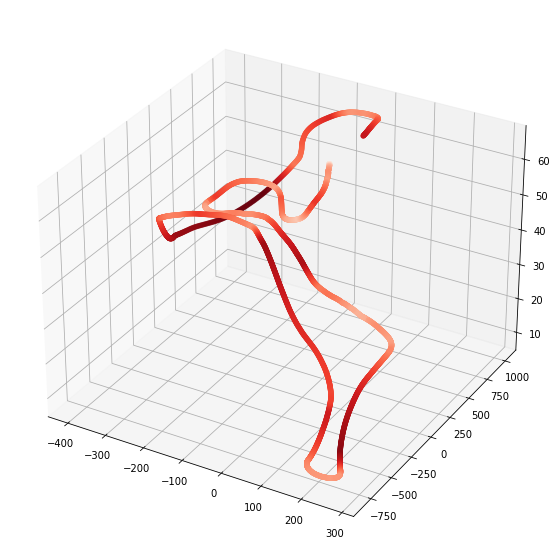

In [76]:
# plot one track and color it by speed
# note that the first track usually is not fully connected due to the driver starting from the box lane
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
_ = ax.scatter(first_track['carCoordinates_00_x'], first_track['carCoordinates_00_z'], first_track['carCoordinates_00_y'], c=first_track['speedKmh'] / max(first_track['speedKmh']), cmap=matplotlib.cm.get_cmap('Reds'))

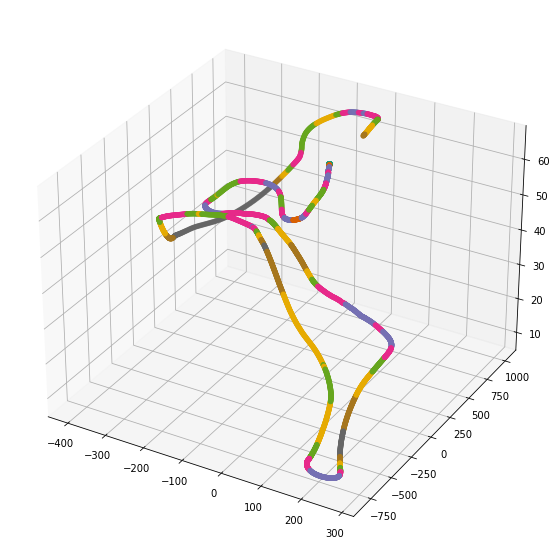

In [86]:
fig = plt.figure(figsize=(10, 10))
ax = fig.add_subplot(projection='3d')
_ = ax.scatter(first_track['carCoordinates_00_x'], first_track['carCoordinates_00_z'], first_track['carCoordinates_00_y'], c=first_track['speedKmh'] / max(first_track['gear']), cmap=matplotlib.cm.get_cmap('Dark2'))